In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import random

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [7]:
ref_genes = standardizer.reference_genes(9606, 'orp')  # only consider supported protein coding-genes

In [8]:
out_folder = '190429_visualize_gtex_prediction'

In [9]:
in_folder = '190428_predict_gtex_with_mirnas'

In [10]:
from access_aging_data import companions

In [11]:
all_de = companions.tstoeger_190427_gtex()
all_de = all_de[
    (all_de['younger'].isin([2, 3])) &
    (all_de['older'].isin([4, 5, 6, 7]))
]

In [12]:
all_de.loc[:, 'significant'] = all_de['padj'] < 0.05

In [13]:
all_de.loc[:, 'reduced_tissue'] = all_de['tissue'].str.replace(
    ' - ', '_').str.replace(' ', '_').str.replace(
    '-', '_').str.replace('(','').str.replace(')', '')

In [14]:

all_de.loc[:, 'condition'] = all_de.loc[:, 'gender'] + 's_' + all_de['reduced_tissue'] + '_' + \
    all_de['older'].astype(int).astype(str) + '_vs_' + all_de['younger'].astype(int).astype(str)

In [15]:
all_de = all_de[all_de['gene_ncbi'].isin(ref_genes)]

In [16]:
save_images = True

In [17]:
# filter_pattern = '_[4567]_vs_[23]$'

In [18]:
import glob

In [19]:
ref_genes = standardizer.reference_genes(9606, 'orp')

# pr = properties.genbank_validated_rna(9606)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
#     'Genbank_validated_RNA: full_SumACGT': 'length'
# })

In [20]:
# agg = []

# stem = inout.get_internal_path('datasets/tstoeger/190318_from_gtex_by_rgrant')

# g = pd.Series(glob.glob(
#     '{}/*'.format(stem))).to_frame('path')
# g['file'] = g['path'].str.extract('.*/(.*)$')
# g['gender'] = g['file'].str.extract('190503GTEx_Science_2015_(.*)_subregion')
# g['region'] = g['file'].str.extract('190503GTEx_Science_2015_.*_subregion_(.*)_subset')


# for j in g.index:
#     p = '{}/{}*'.format(os.path.join(stem, g.loc[j, 'file']),g.loc[j, 'file'])
    
#     curr_gender = g.loc[j, 'gender']
#     curr_region = g.loc[j, 'region']
    
#     h = glob.glob(p)

#     if len(h)>0:
#         h = pd.Series(glob.glob(p)).to_frame('path')
#         h['file'] = h['path'].str.extract('.*/(.*)$')
#         h['older'] = h['file'].str.extract('.*_([0-9]*)_vs_[0-9]*_dge.csv').astype(float)
#         h['younger'] = h['file'].str.extract('.*_[0-9]*_vs_([0-9]*)_dge.csv').astype(float)

#         for jj in h.index:
#             df = pd.read_csv(
#                 h.loc[jj, 'path'],
#                 usecols=['entrezgene', 'log2FoldChange', 'padj']
#             ).dropna(
#                 subset=['padj']
#             ).rename(columns={'entrezgene': 'gene_ncbi'})
            
#             df.loc[:, 'significant'] = df.loc[:, 'padj'] < 0.05

#             df = df[df['gene_ncbi'].isin(ref_genes)]
#             df = pd.merge(df, pr)
#             r, p = spearmanr(df['log2FoldChange'], df['length'])
            
#             stats = dict()
#             stats['gender'] = curr_gender
#             stats['region'] = curr_region
#             stats['rho'] = r
#             stats['pval'] = p
#             stats['younger'] = h.loc[jj, 'younger']
#             stats['older'] = h.loc[jj, 'older']
#             stats['significant'] = df['significant'].sum()
            
#             agg.append(stats)

# master = pd.DataFrame(agg)

# f = master['region'].str.startswith('Cells')

# master = master[~f]

In [21]:
all_de

,gene_ncbi,o_over_y,pvalue,padj,tissue,younger,older,gender,significant,reduced_tissue,condition
22069,5266,0.748881,1.138487e-01,3.649429e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22070,2070,1.833579,2.629287e-15,3.106635e-11,Adipose - Subcutaneous,2.0,4.0,male,True,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22071,1149,-0.571809,7.038488e-02,2.831571e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22072,440295,-1.631328,3.679263e-02,NaN,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22073,4327,0.073817,7.597794e-01,8.978201e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22074,9136,-0.305971,5.148311e-02,2.405613e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22075,4000,-0.003826,9.704099e-01,9.885347e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22076,6556,0.390530,2.784741e-01,5.747770e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22077,51050,0.022935,9.613243e-01,9.850101e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2
22079,56342,-0.325834,3.153297e-02,1.831749e-01,Adipose - Subcutaneous,2.0,4.0,male,False,Adipose_Subcutaneous,males_Adipose_Subcutaneous_4_vs_2


In [22]:
# master['condition'] =  master['gender'] + '_' + master['region'] + '_' + \
#                   master['older'].astype(int).astype(str) + \
#                   '_vs_' + master['younger'].astype(int).astype(str)

In [23]:
master = all_de.copy()

In [24]:
master = master[['condition', 'significant', 'younger', 'older', 'tissue']].groupby(
    ['condition', 'younger', 'older', 'tissue']).agg(sum).reset_index()

In [25]:
master.head(2)

,condition,younger,older,tissue,significant
0,females_Adipose_Subcutaneous_4_vs_2,2.0,4.0,Adipose - Subcutaneous,229.0
1,females_Adipose_Subcutaneous_4_vs_3,3.0,4.0,Adipose - Subcutaneous,21.0


In [26]:
sign = master[['condition', 'significant']].set_index('condition')

In [27]:
agg = []


for condition in master['condition'].unique():

    p = export.get_material_path(
        '{}/predictions_{}.csv'.format(in_folder, condition))

    if os.path.exists(p):
        agg.append(pd.read_csv(p))



In [28]:
df = pd.concat(agg).rename(columns={'Unnamed: 0': 'condition'}).set_index('condition')

In [29]:
df['mean'] = df.mean(1)

In [30]:
d = pd.merge(sign.reset_index(), df[['mean']].reset_index())

In [31]:
f = d['significant'] > 0
d.loc[f, 'log_significant'] = d.loc[f, 'significant'].apply(lambda x: np.log10(x))

In [32]:
zeros = sum(~f)

In [33]:
h = []
for j in range(zeros):
    h.append(-1 + random.randrange(0, 10)/20)
d.loc[~f, 'log_significant'] = h

In [34]:
d.head()

,condition,significant,mean,log_significant
0,females_Adipose_Subcutaneous_4_vs_2,229.0,0.335685,2.359835
1,females_Adipose_Subcutaneous_4_vs_3,21.0,0.336672,1.322219
2,females_Adipose_Subcutaneous_5_vs_2,1258.0,0.294289,3.099681
3,females_Adipose_Subcutaneous_5_vs_3,101.0,0.303822,2.004321
4,females_Adipose_Subcutaneous_6_vs_2,1085.0,0.325696,3.035430


In [35]:
# filter_pattern

In [36]:
# f = d['condition'].str.contains(filter_pattern)

# d = d[f]

In [37]:
d

,condition,significant,mean,log_significant
0,females_Adipose_Subcutaneous_4_vs_2,229.0,0.335685,2.359835
1,females_Adipose_Subcutaneous_4_vs_3,21.0,0.336672,1.322219
2,females_Adipose_Subcutaneous_5_vs_2,1258.0,0.294289,3.099681
3,females_Adipose_Subcutaneous_5_vs_3,101.0,0.303822,2.004321
4,females_Adipose_Subcutaneous_6_vs_2,1085.0,0.325696,3.035430
5,females_Adipose_Subcutaneous_6_vs_3,103.0,0.304136,2.012837
6,females_Adipose_Subcutaneous_7_vs_2,2287.0,0.324090,3.359266
7,females_Adipose_Subcutaneous_7_vs_3,438.0,0.227078,2.641474
8,females_Adipose_Visceral_Omentum_4_vs_2,28.0,0.274398,1.447158
9,females_Adipose_Visceral_Omentum_4_vs_3,0.0,0.326563,-1.000000


In [38]:
d = pd.merge(d, master[['condition', 'younger', 'older']].drop_duplicates())

In [39]:
agg = []


for condition in d['condition'].unique():

    p = export.get_material_path(
        '{}/features_{}.csv'.format(in_folder, condition))

    if os.path.exists(p):
        h = pd.read_csv(p).set_index('feature')
        h = h.mean(1).to_frame('contribution').rename_axis('feature').reset_index()
        h.loc[:, 'condition'] = condition
        agg.append(h)



u = pd.concat(agg)

In [40]:
pi = u.pivot(index='condition', columns='feature', values='contribution')

In [41]:
pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'].mean()

9.693739424703892

In [42]:
(pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'] == 1).sum()

63

In [43]:
is_first = pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'] == 1
is_top_ten = pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'].isin(range(2, 11))
is_not_top_ten = pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT']>10

In [44]:
is_first.sum()


63

In [45]:
is_top_ten.sum()



340

In [46]:
is_not_top_ten.sum()

188

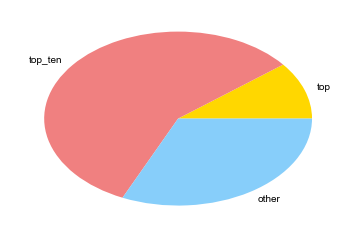

In [47]:
sizes = [is_first.sum(), is_top_ten.sum(), is_not_top_ten.sum()];
labels = ['top', 'top_ten', 'other'];
colors = ['gold', 'lightcoral', 'lightskyblue'];
 
plt.pie(sizes, labels=labels, colors=colors)


if save_images:
    export.export_image(
    '{}/pie.pdf'.format(out_folder))

In [48]:
d = d.set_index('condition')

In [49]:
d

,significant,mean,log_significant,younger,older
condition,,,,,
females_Adipose_Subcutaneous_4_vs_2,229.0,0.335685,2.359835,2.0,4.0
females_Adipose_Subcutaneous_4_vs_3,21.0,0.336672,1.322219,3.0,4.0
females_Adipose_Subcutaneous_5_vs_2,1258.0,0.294289,3.099681,2.0,5.0
females_Adipose_Subcutaneous_5_vs_3,101.0,0.303822,2.004321,3.0,5.0
females_Adipose_Subcutaneous_6_vs_2,1085.0,0.325696,3.035430,2.0,6.0
females_Adipose_Subcutaneous_6_vs_3,103.0,0.304136,2.012837,3.0,6.0
females_Adipose_Subcutaneous_7_vs_2,2287.0,0.324090,3.359266,2.0,7.0
females_Adipose_Subcutaneous_7_vs_3,438.0,0.227078,2.641474,3.0,7.0
females_Adipose_Visceral_Omentum_4_vs_2,28.0,0.274398,1.447158,2.0,4.0


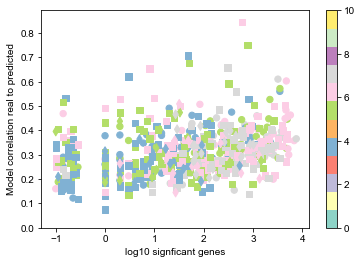

In [50]:
# plt.scatter(d.loc[~f, 'log_significant'], d.loc[~f, 'mean'], c=d.loc[~f, 'older'], s=40, cmap='viridis')

plt.scatter(
    d.loc[is_not_top_ten, 'log_significant'], 
    d.loc[is_not_top_ten, 'mean'], 
    c=d.loc[is_not_top_ten, 'older'], 
    s=40, 
    cmap='Set3',
    marker='o',
    vmin=0,
    vmax=10
)


plt.scatter(
    d.loc[is_top_ten, 'log_significant'], 
    d.loc[is_top_ten, 'mean'], 
    c=d.loc[is_top_ten, 'older'], 
    s=40, 
    cmap='Set3',
    marker='s',
    vmin=0,
    vmax=10
)

plt.scatter(
    d.loc[is_first, 'log_significant'], 
    d.loc[is_first, 'mean'], 
    c=d.loc[is_first, 'older'], 
    s=40, 
    cmap='Set3',
    marker='d',
    vmin=0,
    vmax=10
)

plt.xlabel('log10 signficant genes')
plt.ylabel('Model correlation real to predicted')
plt.colorbar()

plt.gca().set_ylim(bottom=0)

if save_images:
    export.export_image(
    '{}/prediction_accuracy.pdf'.format(out_folder))

In [51]:
h = pd.merge(
    d.reset_index(), 
    pi.rank(
        1, ascending=False).loc[
        :, ['rna_full_SumACGT', 'rna_cds_SumACGT', 'gene_SumACGT']].min(
        1).to_frame('length_rank').rename_axis('condition').reset_index()
    

)

bins_of_interest = {
    '1-5': [1, 2, 3, 4, 5],
    '6-10': [6, 7, 8, 9, 10]
}



h.loc[:, 'bin'] =np.nan

for k in bins_of_interest.keys():
    f = h['length_rank'].isin(bins_of_interest[k])
    h.loc[f, 'bin'] = k

f = h['length_rank'] > 10
h.loc[f, 'bin'] = '11-{}'.format(int(pi.shape[1]))

g = h[['bin', 'mean']].groupby('bin')

to_visualize = pd.merge(   
    g.median().reset_index(),
    g.size().to_frame('comparisons').rename_axis('bin').reset_index()
).set_index('bin')

intended_order = [
    '1-5',
    '6-10',
    '11-{}'.format(int(pi.shape[1]))
]

to_visualize = to_visualize.loc[intended_order, :].reset_index()

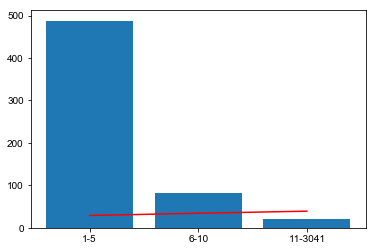

In [52]:
height = to_visualize.loc[:, 'comparisons']
bars = to_visualize.loc[:, 'bin']
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)



height = to_visualize.loc[:, 'mean']

plt.plot(y_pos, height*100, 'r')






if save_images:
    export.export_image(
    '{}/fraction_of_experiments.pdf'.format(out_folder))


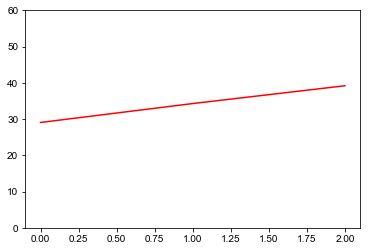

In [53]:
save_late_images = True

plt.plot(y_pos, height*100, 'r')

plt.ylim(0, 60)
# plt.gca().set_ylim(bottom=0)

if save_images:
    export.export_image(
    '{}/red_line_for_helper_axis.pdf'.format(out_folder))



In [54]:
h[
    (h['significant']<10) &
    (h['mean']>0.3) & 
    (h['bin']=='1')
].sort_values('mean', ascending=False)

,condition,significant,mean,log_significant,younger,older,length_rank,bin


In [55]:
h['log_significant'].min()

-1.0

In [56]:
f = pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'] == 1

In [57]:
d.loc[is_first, 'perf'] = 'top'
d.loc[is_top_ten, 'perf'] = 'top ten'
d.loc[is_not_top_ten, 'perf'] = 'not top ten'

In [58]:
d.loc[is_first, 'perf'] = 'top'
d.loc[~is_first, 'perf'] = 'other'
# d.loc[is_top_ten, 'perf'] = 'top ten'
# d.loc[is_not_top_ten, 'perf'] = 'not top ten'

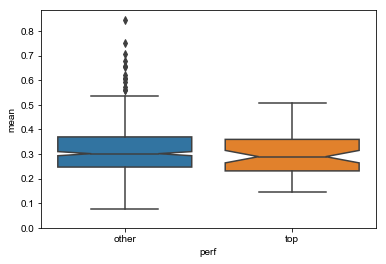

In [59]:
g = sns.boxplot(
    x='perf', 
    y='mean', 
    data=d, 
    notch=True,
    order=['other', 'top']
)

g.set(ylim=(0, None))


if save_images:
    export.export_image(
    '{}/boxen_two.pdf'.format(out_folder))

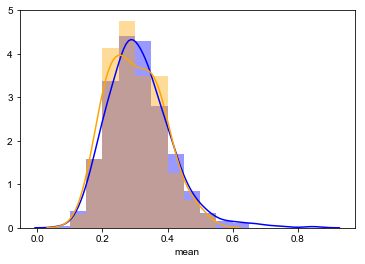

In [60]:
v = np.arange(0, 0.7, 0.05)

sns.distplot(
    d.loc[~is_first, 'mean'],
    bins=v,
    color='blue'

)

sns.distplot(
    d.loc[is_first, 'mean'],
    bins=v,
    color='orange'
)

d.loc[~is_first, 'perf'] = 'other'
d.loc[is_first, 'perf'] = 'top'

if save_images:
    export.export_image(
    '{}/histogram_two.pdf'.format(out_folder))

In [61]:
d['perf'].value_counts()

other    528
top       63
Name: perf, dtype: int64

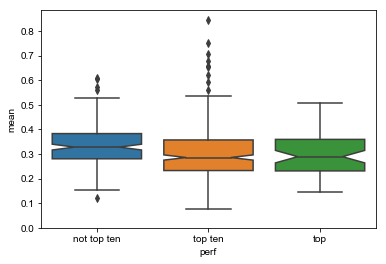

In [62]:
d.loc[is_first, 'perf'] = 'top'
d.loc[is_top_ten, 'perf'] = 'top ten'
d.loc[is_not_top_ten, 'perf'] = 'not top ten'

g = sns.boxplot(
    x='perf', 
    y='mean', 
    data=d, 
    notch=True,
    order=[
        'not top ten',
        'top ten',
        'top'
    ]
)
g.set(ylim=(0, None))

if save_images:
    export.export_image(
    '{}/boxen_three.pdf'.format(out_folder))

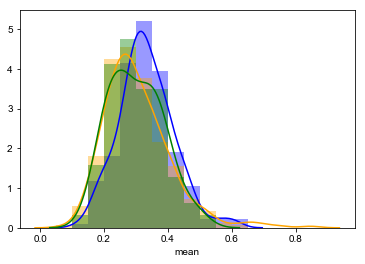

In [63]:
v = np.arange(0, 0.7, 0.05)

sns.distplot(
    d.loc[is_not_top_ten, 'mean'],
    bins=v,
    color='blue'

)

sns.distplot(
    d.loc[is_top_ten, 'mean'],
    bins=v,
    color='orange'
)


sns.distplot(
    d.loc[is_first, 'mean'],
    bins=v,
    color='green'
)

d.loc[~is_first, 'perf'] = 'other'
d.loc[is_first, 'perf'] = 'top'

if save_images:
    export.export_image(
    '{}/histogram_three.pdf'.format(out_folder))


In [64]:
is_first =  (pi.rank(1, ascending=False).loc[:, 'rna_full_SumACGT'] == 1) | \
            (pi.rank(1, ascending=False).loc[:, 'rna_cds_SumACGT'] == 1) | \
            (pi.rank(1, ascending=False).loc[:, 'gene_SumACGT'] == 1)



In [65]:
d.loc[is_first, 'perf'] = 'top'
d.loc[~is_first, 'perf'] = 'other'

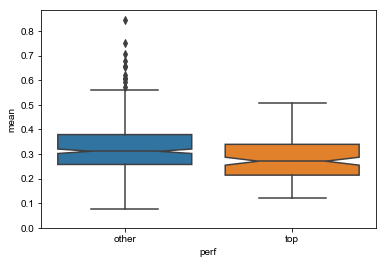

In [66]:
g = sns.boxplot(
    x='perf', 
    y='mean', 
    data=d, 
    notch=True,
    order=['other', 'top']
)

g.set(ylim=(0, None))


if save_images:
    export.export_image(
    '{}/boxplot_two_all_length.pdf'.format(out_folder))

In [67]:
def z(x):
    return (x - np.mean(x)) / np.std(x)

In [68]:
piz = pi.apply(lambda x: z(x), 1)

In [69]:
piz = piz.loc[:, piz.isnull().sum() == 0]

In [70]:
collected_importance = pi.mean().to_frame('mean importance')
collected_importance = collected_importance.sort_values(
    'mean importance', 
    ascending=False)

collected_importance.loc[:, 'cumulative'] = collected_importance['mean importance'].cumsum()

In [71]:
if save_images:
    export.export_full_frame(
        '{}/collected_importance.xlsx'.format(out_folder),
    collected_importance)

In [72]:
collected_importance

,mean importance,cumulative
feature,,
rna_full_CG,8.454139e-02,0.084541
rna_full_SumACGT,5.271547e-02,0.137257
tf_different_tfs,5.237422e-02,0.189631
gene_SumACGT,5.187877e-02,0.241510
miRNA_total,4.189908e-02,0.283409
gene_C,3.546044e-02,0.318869
rna_cds_SumACGT,3.157935e-02,0.350449
tf_BCL3,3.048695e-02,0.380936
gene_A,2.590875e-02,0.406844


In [73]:
pi.mean().sort_values(ascending=False).head()

feature
rna_full_CG         0.084541
rna_full_SumACGT    0.052715
tf_different_tfs    0.052374
gene_SumACGT        0.051879
miRNA_total         0.041899
dtype: float64

In [74]:
x = pi.transpose().rank(ascending=False)

In [75]:
if save_images:
    export.export_full_frame(
        '{}/ranks.xlsx'.format(out_folder),
    x)

In [76]:
x.median(1).sort_values()

feature
gene_SumACGT               4.0
rna_full_CG                4.0
tf_different_tfs           5.0
rna_full_SumACGT           7.0
miRNA_total                8.0
rna_cds_SumACGT           10.0
gene_A                    11.0
gene_G                    12.0
gene_C                    13.0
gene_T                    16.0
gene_CG                   18.0
exons_max_ensembl         19.0
transcripts_ensembl       23.0
exons_median_ensembl      26.0
tf_NEUROD1                28.0
tf_E2F1                   28.0
chromosome                30.0
tf_BCL3                   33.0
exons_min_ensembl         36.0
tf_JARID2                 36.0
tf_KDM5A                  45.0
tf_JUN                    52.0
tf_AR                     52.0
tf_PPARG                  53.0
tf_SPI1                   55.0
tf_RELA                   56.0
tf_MYCN                   62.0
tf_ETS1                   63.0
tf_KMT2A                  64.0
tf_CREB1                  65.0
                         ...  
tf_ZNF740               1800.0


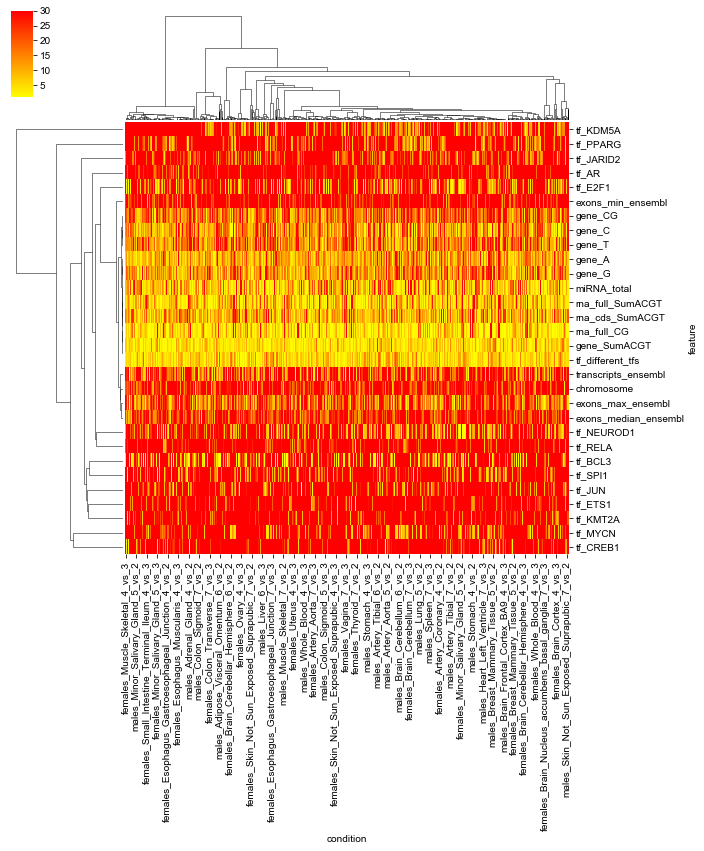

In [77]:
sns.clustermap(
    x.loc[x.median(1).sort_values().index[:30], :], 
    vmin=1, 
    vmax=30, 
    cmap='autumn_r', 
    method='ward',
)


if save_images:
    export.export_image(
        '{}/autumn_to_30.pdf'.format(out_folder))